# Load Packages

In [ ]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(49) # note that you must use the same seed to ensure consistentcy in your training/validation/testing
tf.random.set_seed(49)

# Import Dataset
The full dataset is huge (+37GB) with +13K images of 18 classes. So it will take a while to download, extract, and process. To save you time and effort, a subset of the data has been resized and compressed to only 379Mb and stored in my Firebase server. This dataset will be the one you will benchmark for your grade. If you are up for a challenge (and perhaps bonus points), contact the instructor for the full dataset!

In [ ]:
## Download dataset from FirebaseStorage
##!wget https://www.kaggle.com/vishalmane109/indian-currency-note-images-dataset-2020/download

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Extract content
#!unzip "/content/drive/MyDrive/archive.zip"

In [ ]:
# Add class folder structure to test folder

# Check if one of the desired folders exists to prevent FileExistsError
if not os.path.exists('./Indian currency dataset v1/test/10/'):
  test_files = os.listdir('./Indian currency dataset v1/test')
  test_classes = [(name.replace('.', '').replace('_', '__').split('__'))[0] for name in test_files]

  test_tups = list(zip(test_classes, test_files))

  test_dict = {}
  for tup in test_tups:
    key = tup[0]
    val = tup[1]
    if tup[0] in test_dict:
      test_dict[key].append(val)
    else:
      test_dict[key] = [val]

  for key in test_dict.keys():
    test_dir = './Indian currency dataset v1/test'
    os.mkdir(f'{test_dir}/{key}')
    for file_name in test_dict[key]:
      os.rename(f'{test_dir}/{file_name}', f'{test_dir}/{key}/{file_name}')
#if you run this code it'll fix the test stuff


In [ ]:
from sklearn.datasets import load_files 
from keras.utils import np_utils

from keras.preprocessing import image
from tqdm import tqdm # progress bar

data_dir = "/content/Indian currency dataset v1/"
batch_size = 32;

# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 224; 
img_width = 224;

# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + 'training/',
    validation_split = 0.1,
    subset = "training",
    seed = 49,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

# Validation Dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + 'validation',
    validation_split = 0.2,
    subset = "validation",
    seed = 49,
    image_size = (img_height, img_width),
    batch_size = batch_size
)        

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + 'test/',
    seed = 49,
    image_size = (img_height, img_width),
    batch_size = batch_size
)     

Found 3566 files belonging to 8 classes.
Using 3210 files for training.
Found 345 files belonging to 8 classes.
Using 69 files for validation.
Found 91 files belonging to 8 classes.


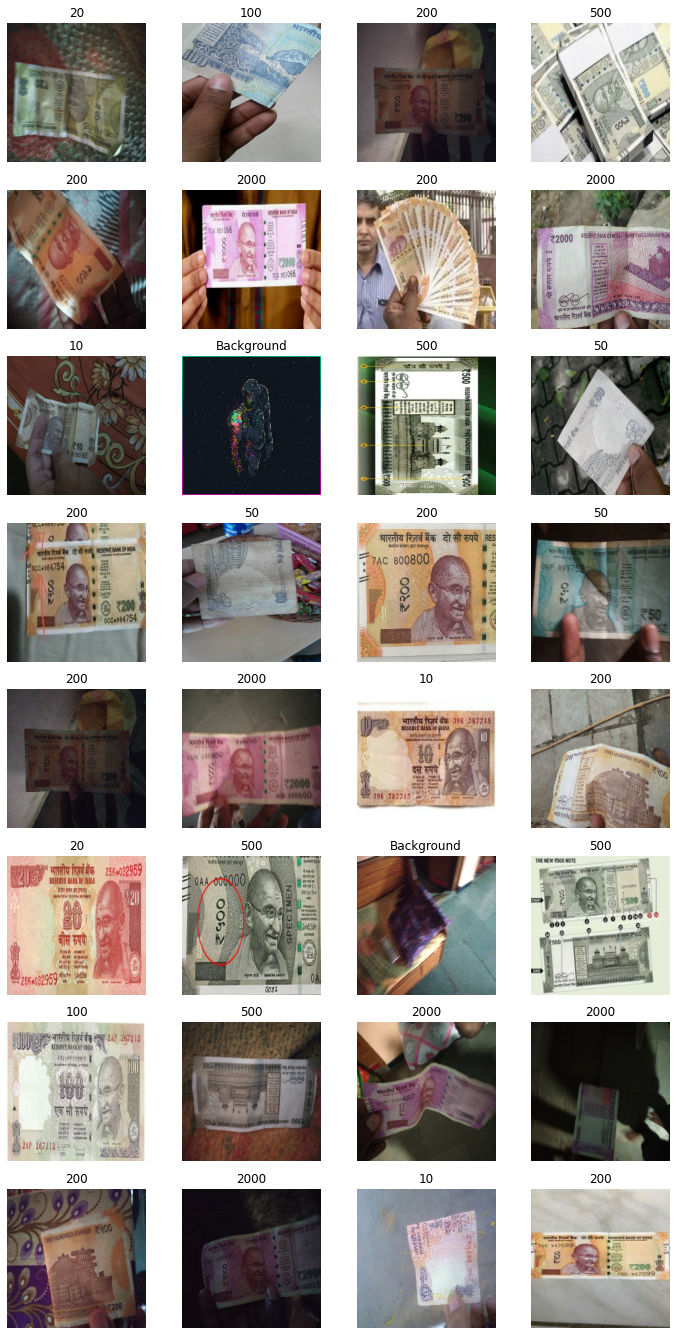

In [ ]:
# Visualize some of the train samples of one batch
# Make sure you create the class names that match the order of their appearances in the "files" variable
class_names = ['10', '100', '20', '200', 
  '2000', '50', '500','Background']

# Rows and columns are set to fit one training batch (32)
n_rows = 8
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)


# It's your turn: Building a classifier for UVA Landmark Dataset
You may design your own architecture AND re-use any of the exising frameworks. 

Best of luck!

In [ ]:
# YOUR CODE STARTS HERE

In [ ]:
model = keras.applications.resnet50.ResNet50(weights = "imagenet")
images_resized = tf.image.resize(images, [224,224])
inputs = keras.applications.resnet50.preprocess_input(images_resized * 225)


In [ ]:
n_classes = 8

base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)
#base_model = keras.applications.resnet50.ResNet50(weights="imagenet", include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)

# output00 = keras.layers.Dense(8 * n_classes, activation = "relu")(avg)
# norm00 = tf.keras.layers.BatchNormalization()(output00)
# output0 = keras.layers.Dense(4 * n_classes, activation = "relu")(norm00)
# norm0 = tf.keras.layers.BatchNormalization()(output0)

output1 = keras.layers.Dense(3 * n_classes, activation = "relu")(avg)
norm1 = tf.keras.layers.BatchNormalization()(output1)
output2 = keras.layers.Dense(2 * n_classes, activation = "relu")(norm1)
norm2 = tf.keras.layers.BatchNormalization()(output2)

# output3 = keras.layers.Dense(4 * n_classes, activation = "relu")(norm2)
# norm3 = tf.keras.layers.BatchNormalization()(output3)
# output4 = keras.layers.Dense(2 * n_classes, activation = "relu")(norm3)
# norm4 = tf.keras.layers.BatchNormalization()(output4)
# output5 = keras.layers.Dense(2 * n_classes, activation = "relu")(norm4)
# norm5 = tf.keras.layers.BatchNormalization()(output5)

output = keras.layers.Dense( n_classes, activation = "softmax")(norm1)
model = keras.Model(inputs=base_model.input, outputs=output)


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

dataset_size = 11429
optimizer = keras.optimizers.SGD(lr = 0.1, momentum = 0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history = model.fit(train_ds, 
                    steps_per_epoch = int(0.75 * 2*len(train_ds) / batch_size), 
                    validation_data = validation_ds,
                    validation_steps = int(0.15 * 2*len(train_ds) / batch_size),
                    epochs=20)

Epoch 1/20
4/4 [==============================] - 14s 796ms/step - loss: 2.4730 - accuracy: 0.0698
Epoch 2/20
4/4 [==============================] - 3s 737ms/step - loss: 2.0484 - accuracy: 0.1531
Epoch 3/20
4/4 [==============================] - 3s 805ms/step - loss: 2.1179 - accuracy: 0.0875
Epoch 4/20
4/4 [==============================] - 3s 794ms/step - loss: 2.0885 - accuracy: 0.1010
Epoch 5/20
4/4 [==============================] - 3s 717ms/step - loss: 2.0485 - accuracy: 0.1688
Epoch 6/20
4/4 [==============================] - 3s 750ms/step - loss: 2.1490 - accuracy: 0.1198
Epoch 7/20
4/4 [==============================] - 3s 668ms/step - loss: 2.0214 - accuracy: 0.1802
Epoch 8/20
4/4 [==============================] - 3s 671ms/step - loss: 2.0812 - accuracy: 0.1646
Epoch 9/20
4/4 [==============================] - 3s 706ms/step - loss: 2.1176 - accuracy: 0.1417
Epoch 10/20
4/4 [==============================] - 3s 764ms/step - loss: 2.1249 - accuracy: 0.1187
Epoch 11/20
4/4 [=

In [ ]:
model.evaluate(test_ds)

3/3 [==============================] - 4s 638ms/step - loss: 1.9515 - accuracy: 0.1978


[1.9515362977981567, 0.19780220091342926]

In [ ]:
for layer in base_model.layers:
  layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9, nesterov = True, decay = 0.001)

model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

history = model.fit(train_ds, 
                    steps_per_epoch = int(0.75 * len(train_ds) / batch_size), 
                    validation_data = validation_ds,
                    validation_steps = int(0.15 * len(train_ds) / batch_size), 
                    epochs = 40)

Epoch 1/40
2/2 [==============================] - 13s 1s/step - loss: 2.2800 - accuracy: 0.0833
Epoch 2/40
2/2 [==============================] - 2s 1s/step - loss: 2.1996 - accuracy: 0.1146
Epoch 3/40
2/2 [==============================] - 2s 1s/step - loss: 1.9970 - accuracy: 0.2292
Epoch 4/40
2/2 [==============================] - 2s 1s/step - loss: 1.9877 - accuracy: 0.2188
Epoch 5/40
2/2 [==============================] - 2s 1s/step - loss: 1.9542 - accuracy: 0.3021
Epoch 6/40
2/2 [==============================] - 3s 1s/step - loss: 1.8302 - accuracy: 0.3125
Epoch 7/40
2/2 [==============================] - 2s 1s/step - loss: 1.7485 - accuracy: 0.3854
Epoch 8/40
2/2 [==============================] - 2s 1s/step - loss: 1.7496 - accuracy: 0.4167
Epoch 9/40
2/2 [==============================] - 2s 1s/step - loss: 1.7698 - accuracy: 0.3021
Epoch 10/40
2/2 [==============================] - 2s 1s/step - loss: 1.5936 - accuracy: 0.5417
Epoch 11/40
2/2 [==============================]

In [ ]:
model.evaluate(test_ds)

3/3 [==============================] - 3s 131ms/step - loss: 2.2705 - accuracy: 0.1758


[2.2705488204956055, 0.17582418024539948]

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

dataset_size = 11429
optimizer = keras.optimizers.SGD(lr = 0.05, momentum = 0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history = model.fit(train_ds, 
                    steps_per_epoch = int(0.75 * 2*len(train_ds) / batch_size), 
                    validation_data = validation_ds,
                    validation_steps = int(0.15 * 2*len(train_ds) / batch_size),
                    epochs=20)

Epoch 1/20
4/4 [==============================] - 10s 740ms/step - loss: 0.5885 - accuracy: 0.8344
Epoch 2/20
4/4 [==============================] - 3s 706ms/step - loss: 0.6262 - accuracy: 0.8177
Epoch 3/20
4/4 [==============================] - 3s 806ms/step - loss: 0.5460 - accuracy: 0.8729
Epoch 4/20
4/4 [==============================] - 3s 796ms/step - loss: 0.6831 - accuracy: 0.7583
Epoch 5/20
4/4 [==============================] - 3s 725ms/step - loss: 0.4946 - accuracy: 0.8021
Epoch 6/20
4/4 [==============================] - 3s 768ms/step - loss: 0.4609 - accuracy: 0.8208
Epoch 7/20
4/4 [==============================] - 3s 669ms/step - loss: 0.3902 - accuracy: 0.8698
Epoch 8/20
4/4 [==============================] - 3s 667ms/step - loss: 0.5353 - accuracy: 0.8177
Epoch 9/20
4/4 [==============================] - 3s 705ms/step - loss: 0.5015 - accuracy: 0.8313
Epoch 10/20
4/4 [==============================] - 3s 766ms/step - loss: 0.4984 - accuracy: 0.7958
Epoch 11/20
4/4 [=

In [ ]:
model.evaluate(test_ds)

3/3 [==============================] - 3s 128ms/step - loss: 2.1716 - accuracy: 0.2637


[2.1715848445892334, 0.2637362778186798]

In [ ]:
for layer in base_model.layers:
  layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate = 0.005, momentum = 0.9, nesterov = True, decay = 0.001)

model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

history = model.fit(train_ds, 
                    steps_per_epoch = int(0.75 * len(train_ds) / batch_size), 
                    validation_data = validation_ds,
                    validation_steps = int(0.15 * len(train_ds) / batch_size), 
                    epochs = 40)

Epoch 1/40
2/2 [==============================] - 11s 1s/step - loss: 0.2392 - accuracy: 0.9271
Epoch 2/40
2/2 [==============================] - 2s 1s/step - loss: 0.2949 - accuracy: 0.9062
Epoch 3/40
2/2 [==============================] - 2s 1s/step - loss: 0.1990 - accuracy: 0.9375
Epoch 4/40
2/2 [==============================] - 2s 1s/step - loss: 0.2391 - accuracy: 0.8854
Epoch 5/40
2/2 [==============================] - 2s 1s/step - loss: 0.2605 - accuracy: 0.8646
Epoch 6/40
2/2 [==============================] - 3s 1s/step - loss: 0.2047 - accuracy: 0.9271
Epoch 7/40
2/2 [==============================] - 2s 1s/step - loss: 0.3340 - accuracy: 0.8958
Epoch 8/40
2/2 [==============================] - 3s 1s/step - loss: 0.3013 - accuracy: 0.9167
Epoch 9/40
2/2 [==============================] - 2s 1s/step - loss: 0.3536 - accuracy: 0.8854
Epoch 10/40
2/2 [==============================] - 2s 1s/step - loss: 0.1239 - accuracy: 0.9792
Epoch 11/40
2/2 [==============================]

In [ ]:
model.evaluate(test_ds)

3/3 [==============================] - 3s 130ms/step - loss: 1.1157 - accuracy: 0.5604


[1.1157097816467285, 0.5604395866394043]

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

dataset_size = 11429
optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history = model.fit(train_ds, 
                    steps_per_epoch = int(0.75 * 2*len(train_ds) / batch_size), 
                    validation_data = validation_ds,
                    validation_steps = int(0.15 * 2*len(train_ds) / batch_size),
                    epochs=20)

Epoch 1/20
4/4 [==============================] - 10s 705ms/step - loss: 0.1027 - accuracy: 0.9740
Epoch 2/20
4/4 [==============================] - 3s 716ms/step - loss: 0.0982 - accuracy: 0.9896
Epoch 3/20
4/4 [==============================] - 3s 805ms/step - loss: 0.0653 - accuracy: 0.9948
Epoch 4/20
4/4 [==============================] - 3s 794ms/step - loss: 0.0943 - accuracy: 0.9760
Epoch 5/20
4/4 [==============================] - 3s 720ms/step - loss: 0.1195 - accuracy: 0.9771
Epoch 6/20
4/4 [==============================] - 3s 749ms/step - loss: 0.0587 - accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 3s 666ms/step - loss: 0.0725 - accuracy: 0.9771
Epoch 8/20
4/4 [==============================] - 3s 662ms/step - loss: 0.0999 - accuracy: 0.9823
Epoch 9/20
4/4 [==============================] - 3s 704ms/step - loss: 0.0540 - accuracy: 0.9865
Epoch 10/20
4/4 [==============================] - 3s 767ms/step - loss: 0.0636 - accuracy: 0.9948
Epoch 11/20
4/4 [=

In [ ]:
model.evaluate(test_ds)

3/3 [==============================] - 3s 137ms/step - loss: 1.0460 - accuracy: 0.5714


[1.0459723472595215, 0.5714285969734192]

In [ ]:
for layer in base_model.layers:
  layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9, nesterov = True, decay = 0.001)

model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

history = model.fit(train_ds, 
                    steps_per_epoch = int(0.75 * len(train_ds) / batch_size), 
                    validation_data = validation_ds,
                    validation_steps = int(0.15 * len(train_ds) / batch_size), 
                    epochs = 40)

Epoch 1/40
2/2 [==============================] - 11s 1s/step - loss: 0.0635 - accuracy: 0.9896
Epoch 2/40
2/2 [==============================] - 2s 1s/step - loss: 0.1047 - accuracy: 0.9792
Epoch 3/40
2/2 [==============================] - 2s 1s/step - loss: 0.0383 - accuracy: 1.0000
Epoch 4/40
2/2 [==============================] - 3s 1s/step - loss: 0.0606 - accuracy: 0.9792
Epoch 5/40
2/2 [==============================] - 2s 1s/step - loss: 0.0538 - accuracy: 0.9896
Epoch 6/40
2/2 [==============================] - 3s 1s/step - loss: 0.1187 - accuracy: 0.9583
Epoch 7/40
2/2 [==============================] - 2s 1s/step - loss: 0.0357 - accuracy: 1.0000
Epoch 8/40
2/2 [==============================] - 3s 1s/step - loss: 0.0570 - accuracy: 0.9896
Epoch 9/40
2/2 [==============================] - 2s 1s/step - loss: 0.0371 - accuracy: 1.0000
Epoch 10/40
2/2 [==============================] - 2s 1s/step - loss: 0.0677 - accuracy: 0.9792
Epoch 11/40
2/2 [==============================]

In [ ]:
model.evaluate(test_ds)

3/3 [==============================] - 3s 133ms/step - loss: 0.9604 - accuracy: 0.6264


[0.9604119062423706, 0.6263736486434937]

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

dataset_size = 11429
optimizer = keras.optimizers.SGD(lr = 0.005, momentum = 0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history = model.fit(train_ds, 
                    steps_per_epoch = int(0.75 * 2*len(train_ds) / batch_size), 
                    validation_data = validation_ds,
                    validation_steps = int(0.15 * 2*len(train_ds) / batch_size),
                    epochs=20)

Epoch 1/20
4/4 [==============================] - 10s 709ms/step - loss: 0.0304 - accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 3s 714ms/step - loss: 0.0237 - accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 3s 804ms/step - loss: 0.0338 - accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 3s 792ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 3s 720ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 3s 755ms/step - loss: 0.0365 - accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 3s 678ms/step - loss: 0.0294 - accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 3s 675ms/step - loss: 0.0440 - accuracy: 0.9969
Epoch 9/20
4/4 [==============================] - 3s 707ms/step - loss: 0.0567 - accuracy: 0.9688
Epoch 10/20
4/4 [==============================] - 3s 765ms/step - loss: 0.0358 - accuracy: 1.0000
Epoch 11/20
4/4 [=

In [ ]:
model.evaluate(test_ds)

3/3 [==============================] - 3s 137ms/step - loss: 0.8936 - accuracy: 0.7033


[0.8935863971710205, 0.7032967209815979]

In [ ]:
for layer in base_model.layers:
  layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate = 0.0005, momentum = 0.9, nesterov = True, decay = 0.001)

model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

history = model.fit(train_ds, 
                    steps_per_epoch = int(0.75 * len(train_ds) / batch_size), 
                    validation_data = validation_ds,
                    validation_steps = int(0.15 * len(train_ds) / batch_size), 
                    epochs = 40)

Epoch 1/40
2/2 [==============================] - 11s 1s/step - loss: 0.0668 - accuracy: 1.0000
Epoch 2/40
2/2 [==============================] - 2s 1s/step - loss: 0.0288 - accuracy: 1.0000
Epoch 3/40
2/2 [==============================] - 2s 1s/step - loss: 0.0260 - accuracy: 1.0000
Epoch 4/40
2/2 [==============================] - 2s 1s/step - loss: 0.0944 - accuracy: 0.9688
Epoch 5/40
2/2 [==============================] - 2s 1s/step - loss: 0.0333 - accuracy: 1.0000
Epoch 6/40
2/2 [==============================] - 3s 1s/step - loss: 0.0244 - accuracy: 1.0000
Epoch 7/40
2/2 [==============================] - 2s 1s/step - loss: 0.0297 - accuracy: 0.9896
Epoch 8/40
2/2 [==============================] - 3s 1s/step - loss: 0.0354 - accuracy: 1.0000
Epoch 9/40
2/2 [==============================] - 2s 1s/step - loss: 0.0792 - accuracy: 0.9896
Epoch 10/40
2/2 [==============================] - 2s 1s/step - loss: 0.0455 - accuracy: 1.0000
Epoch 11/40
2/2 [==============================]

In [ ]:
model.evaluate(test_ds)

3/3 [==============================] - 3s 130ms/step - loss: 0.8150 - accuracy: 0.7582


[0.8150292634963989, 0.7582417726516724]